In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.decomposition import PCA


In [22]:

# Read the CSV file
mydata = pd.read_csv("/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/7-Data compression visualization/MBA_Final.csv")

# Set the row names to the 'University' column and drop it
mydata.index = mydata['University']
mydata = mydata.drop(columns=['University'])


In [23]:
mydata.head()

,Cohort_size,Start_Sal,Pct_Employ,Weather,Cost,Accept_Rate,GMAT_avg,Indebtedness,Work_exp
University,,,,,,,,,
UF_Warrington,90,109466,76.6,69,25474,0.27,686,22705,49
UT_McCombs,491,131609,77.2,70,102040,0.37,704,95260,69
Carnegie_Mellon_Tepper,340,138609,80.9,52,140000,0.28,680,101667,65
UM_Ross,758,139284,79.5,48,132096,0.46,711,102665,64
UC_Berkeley_Haas,627,141516,71.7,58,128492,0.23,727,93602,64


In [27]:
mydata.shape

(10, 9)

In [30]:
# Classical MDS
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=2023)
mds_model_std = embedding.fit_transform(squareform(pdist(mydata)))
mds_model_std = pd.DataFrame(mds_model_std, columns=['Dim 1', 'Dim 2'], index=mydata.index)


In [29]:
mds_model_std.shape

(10, 2)

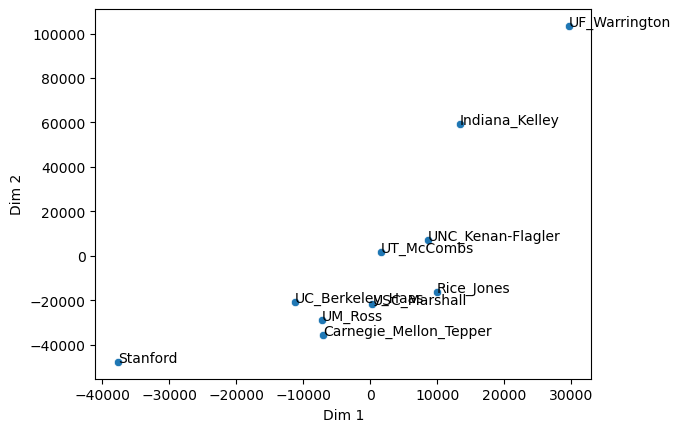

In [31]:
# Plot the MDS dimensions
sns.scatterplot(data=mds_model_std, x='Dim 1', y='Dim 2')
for i, university in enumerate(mds_model_std.index):
    plt.annotate(university, (mds_model_std.iloc[i, 0], mds_model_std.iloc[i, 1]))


In [33]:
# K-means clustering
clust = KMeans(n_clusters=4, random_state=42).fit(mds_model_std)
mds_model_std['groups'] = clust.labels_

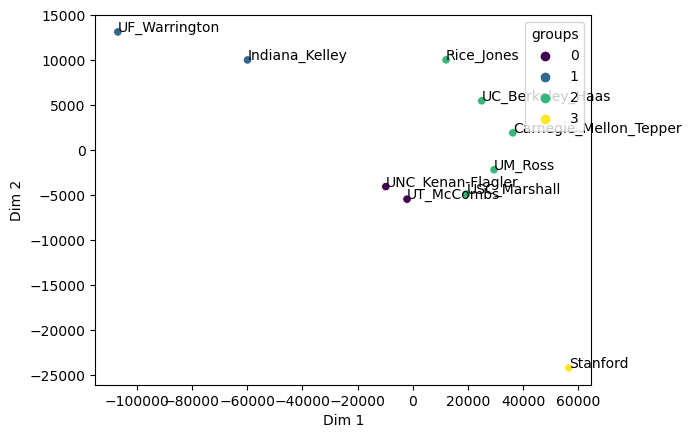

In [6]:
# Plot and color by groups
sns.scatterplot(data=mds_model_std, x='Dim 1', y='Dim 2', hue='groups', palette='viridis', legend='full')
for i, university in enumerate(mds_model_std.index):
    plt.annotate(university, (mds_model_std.iloc[i, 0], mds_model_std.iloc[i, 1]))


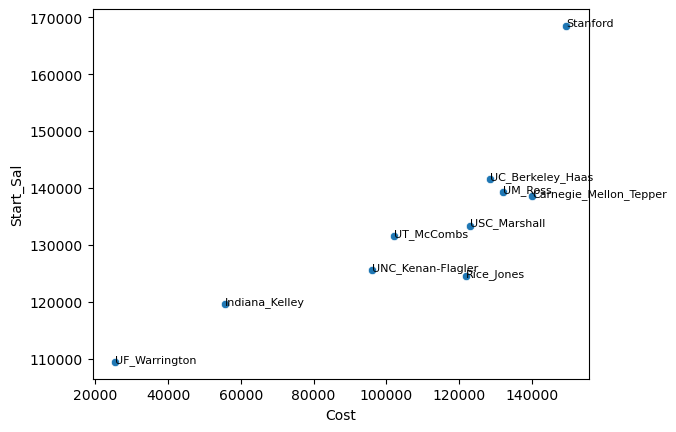

In [34]:
# Potential reasons why?
sns.scatterplot(data=mydata, x='Cost', y='Start_Sal')
for i, university in enumerate(mydata.index):
    plt.annotate(university, (mydata.iloc[i]['Cost'], mydata.iloc[i]['Start_Sal']), fontsize=8)


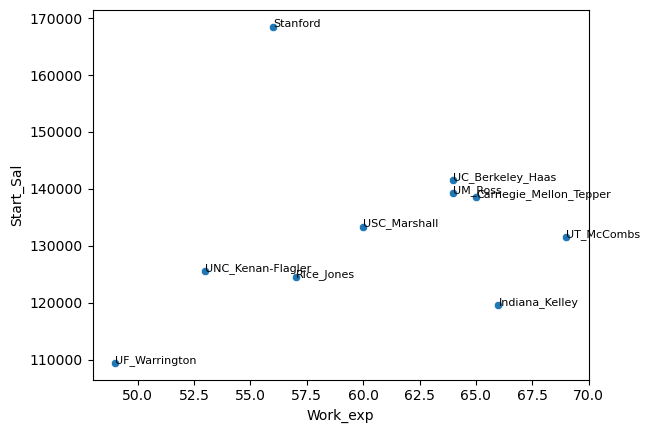

In [35]:
sns.scatterplot(data=mydata, x='Work_exp', y='Start_Sal')
for i, university in enumerate(mydata.index):
    plt.annotate(university, (mydata.iloc[i]['Work_exp'], mydata.iloc[i]['Start_Sal']), fontsize=8)

In [9]:

from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [10]:

# Read the CSV file
mydata_NMDS = pd.read_csv("/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/7-Data compression visualization/BAcenterNMDS.csv")

# Set the row names to the 'University' column and drop it
mydata_NMDS.index = mydata_NMDS['University']
mydata_NMDS = mydata_NMDS.drop(columns=['University'])

# Kruskal's non-metric multidimensional scaling
dissimilarity_matrix = squareform(pdist(mydata_NMDS))
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=1, metric=False) # metric=False is the Non-metric MDS
NMDS_mod1 = embedding.fit_transform(dissimilarity_matrix)
NMDS_mod1 = pd.DataFrame(NMDS_mod1, columns=['Dim 1', 'Dim 2'], index=mydata_NMDS.index)


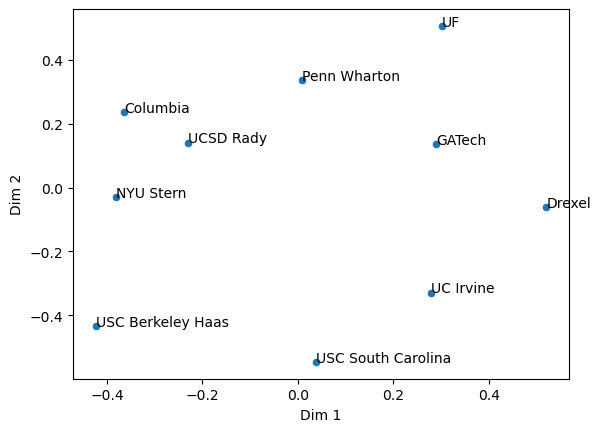

In [11]:

# Plot the NMDS dimensions
sns.scatterplot(data=NMDS_mod1, x='Dim 1', y='Dim 2')
for i, university in enumerate(NMDS_mod1.index):
    plt.annotate(university, (NMDS_mod1.iloc[i, 0], NMDS_mod1.iloc[i, 1]))


In [12]:

# K-means clustering
clust = KMeans(n_clusters=3, random_state=42).fit(NMDS_mod1)
NMDS_mod1['groups'] = clust.labels_


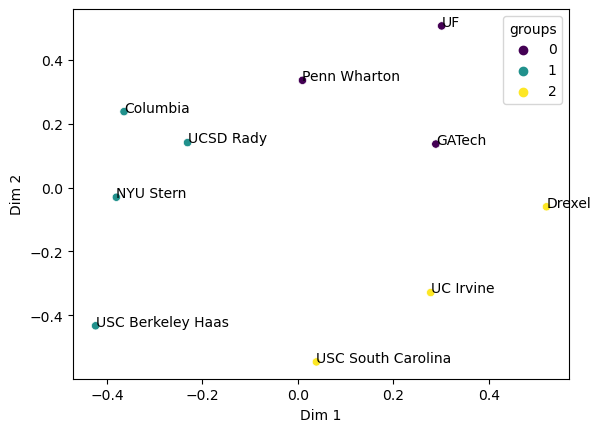

In [13]:

# Plot the non-metric MDS plot with clusters
sns.scatterplot(data=NMDS_mod1, x='Dim 1', y='Dim 2', hue='groups', palette='viridis', legend='full')
for i, university in enumerate(NMDS_mod1.index):
    plt.annotate(university, (NMDS_mod1.iloc[i, 0], NMDS_mod1.iloc[i, 1]))

################################
### Regression with PCA
################################


In [14]:


# Read the CSV file
gasoline = pd.read_csv('/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/7-Data compression visualization/gasoline.csv')
print(gasoline.head())

X = gasoline.iloc[:, 1:]
y = gasoline.iloc[:, 0]


   octane    900 nm    902 nm    904 nm    906 nm    908 nm    910 nm  \
0   85.30 -0.050193 -0.045903 -0.042187 -0.037177 -0.033348 -0.031207   
1   85.25 -0.044227 -0.039602 -0.035673 -0.030911 -0.026675 -0.023871   
2   88.45 -0.046867 -0.041260 -0.036979 -0.031458 -0.026520 -0.023346   
3   83.40 -0.046705 -0.042240 -0.038561 -0.034513 -0.030206 -0.027680   
4   87.90 -0.050859 -0.045145 -0.041025 -0.036357 -0.032747 -0.031498   

     912 nm    914 nm    916 nm  ...   1682 nm   1684 nm   1686 nm   1688 nm  \
0 -0.030036 -0.031298 -0.034217  ...  1.198461  1.224243  1.242645  1.250789   
1 -0.022571 -0.025410 -0.028960  ...  1.128877  1.148342  1.189116  1.223242   
2 -0.021392 -0.024993 -0.029309  ...  1.147964  1.167798  1.198287  1.237383   
3 -0.026042 -0.028280 -0.030920  ...  1.160089  1.169350  1.201066  1.233299   
4 -0.031415 -0.034611 -0.037781  ...  1.252712  1.238013  1.259616  1.273713   

    1690 nm   1692 nm   1694 nm   1696 nm   1698 nm   1700 nm  
0  1.246626  1.2

In [36]:
# Ordinary least squares
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 octane   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                nan
Time:                        13:20:45   Log-Likelihood:                 1504.7
No. Observations:                  60   AIC:                            -2889.
Df Residuals:                       0   BIC:                            -2764.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9908        inf          0        n

/Users/mingzhangyin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/mingzhangyin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/mingzhangyin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


          900 nm    902 nm    904 nm    906 nm    908 nm
900 nm  1.000000  0.994645  0.993238  0.982260  0.978132
902 nm  0.994645  1.000000  0.996733  0.985621  0.983036
904 nm  0.993238  0.996733  1.000000  0.990262  0.989146
906 nm  0.982260  0.985621  0.990262  1.000000  0.994596
908 nm  0.978132  0.983036  0.989146  0.994596  1.000000


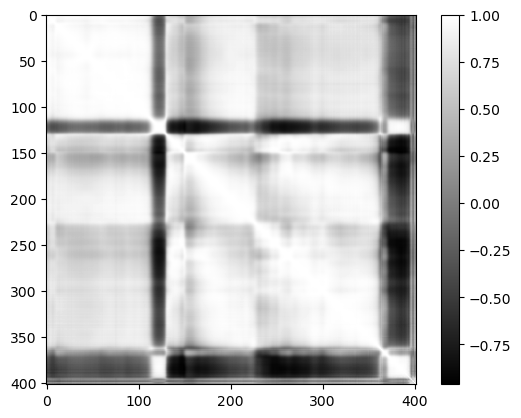

In [37]:
# Correlation matrix
sigma_X = X.corr()
print(sigma_X.iloc[1:6, 1:6])

# Plot the correlation matrix
plt.imshow(sigma_X, cmap='gray')
plt.colorbar()
plt.show()


In [38]:
from scipy.stats import zscore
# PCA
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(zscore(X.iloc[:, 1:])))

pca_summary = pd.DataFrame({
    "explained_variance_ratio": pca.explained_variance_ratio_,
    "cumulative_explained_variance": np.cumsum(pca.explained_variance_ratio_),
})
print(pca_summary.head())


   explained_variance_ratio  cumulative_explained_variance
0                  0.717247                       0.717247
1                  0.168436                       0.885682
2                  0.051697                       0.937379
3                  0.037727                       0.975107
4                  0.007716                       0.982823


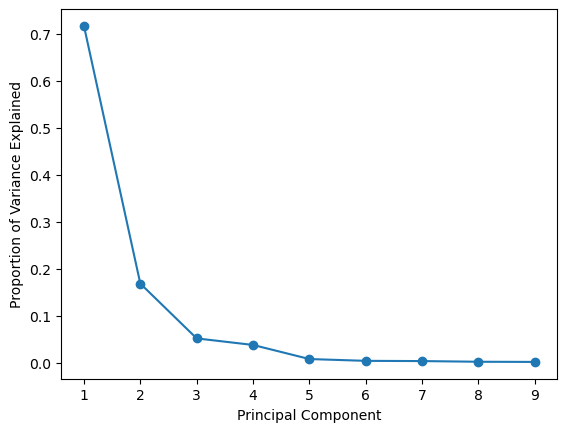

In [40]:
# Scree plot
plt.plot(np.arange(1, 10), pca.explained_variance_ratio_[:9], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 octane   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     583.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.13e-45
Time:                        13:30:38   Log-Likelihood:                 10.062
No. Observations:                  60   AIC:                            -8.124
Df Residuals:                      54   BIC:                             4.443
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.1775      0.028   3130.892      0.0

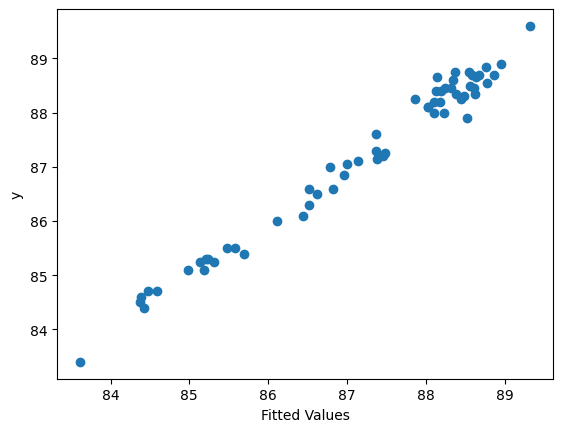

In [42]:
# PCR
K = 5
scores = X_pca.iloc[:, :K]
X_pcr = sm.add_constant(scores)
pcr1 = sm.OLS(y, X_pcr).fit()
print(pcr1.summary())

# Model fit
plt.scatter(pcr1.fittedvalues, y)
plt.xlabel('Fitted Values')
plt.ylabel('y')
plt.show()

### Perception map by PCA

In [ ]:
beer = pd.read_csv("/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/7-Data compression visualization/beer_attributes.csv")

print(beer.head())

# Center and scale the data
beer_centered_scaled = (beer.iloc[:,1:] - np.mean(beer.iloc[:,1:], axis=0)) / np.std(beer.iloc[:,1:], axis=0)
# Perform PCA with two components
pca = PCA(n_components=2)
f2 = pca.fit_transform(beer_centered_scaled)

# Make a plot of where brands fall on the two dimensions:
plt.scatter(f2[:,0], f2[:,1])
plt.xlabel("Quality")
plt.ylabel("Refreshing")
plt.title("Perceptions of Beer")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(y=0, linestyle='--')
plt.axvline(x=0, linestyle='--')
for i, txt in enumerate(beer.iloc[:,0]):
    plt.text(f2[i,0], f2[i,1], txt, fontsize=8, color='red', ha='center', va='center')

plt.show()